In [13]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import calendar

import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [14]:
path = '/home/dgray24/'
fname = 'precip.mon.mean.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 442)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2015-10-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:      COARDS
    title:            GPCP Version 2.2 Combined Precipitation Dataset (Final)
    platform:         Observation
    source:           GPCP Polar Satellite Precipitation Data Centre - Emissi...
    version:          V2.2
    comments:         Please redownload if you obtained this file before Aug ...
    Acknowledgement:  \n,Please cite the original source of the data.\nPlease...
    history:          Converted from netCDF3 to chunked, deflated NetCDF4 Aug...
    dataset_title:    Global Precipitation Analysis (GPCP)
    documentation:    https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    References:       https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html

In [15]:
ds_month=ds.groupby('time.month').mean()
ds_month

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, month: 12)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (month, lat, lon) float32 0.3603 0.3221 0.3476 ... 0.0855 0.07559

Text(0.5, 0.98, 'Average Monthly Rate of Precipitation (1979)')

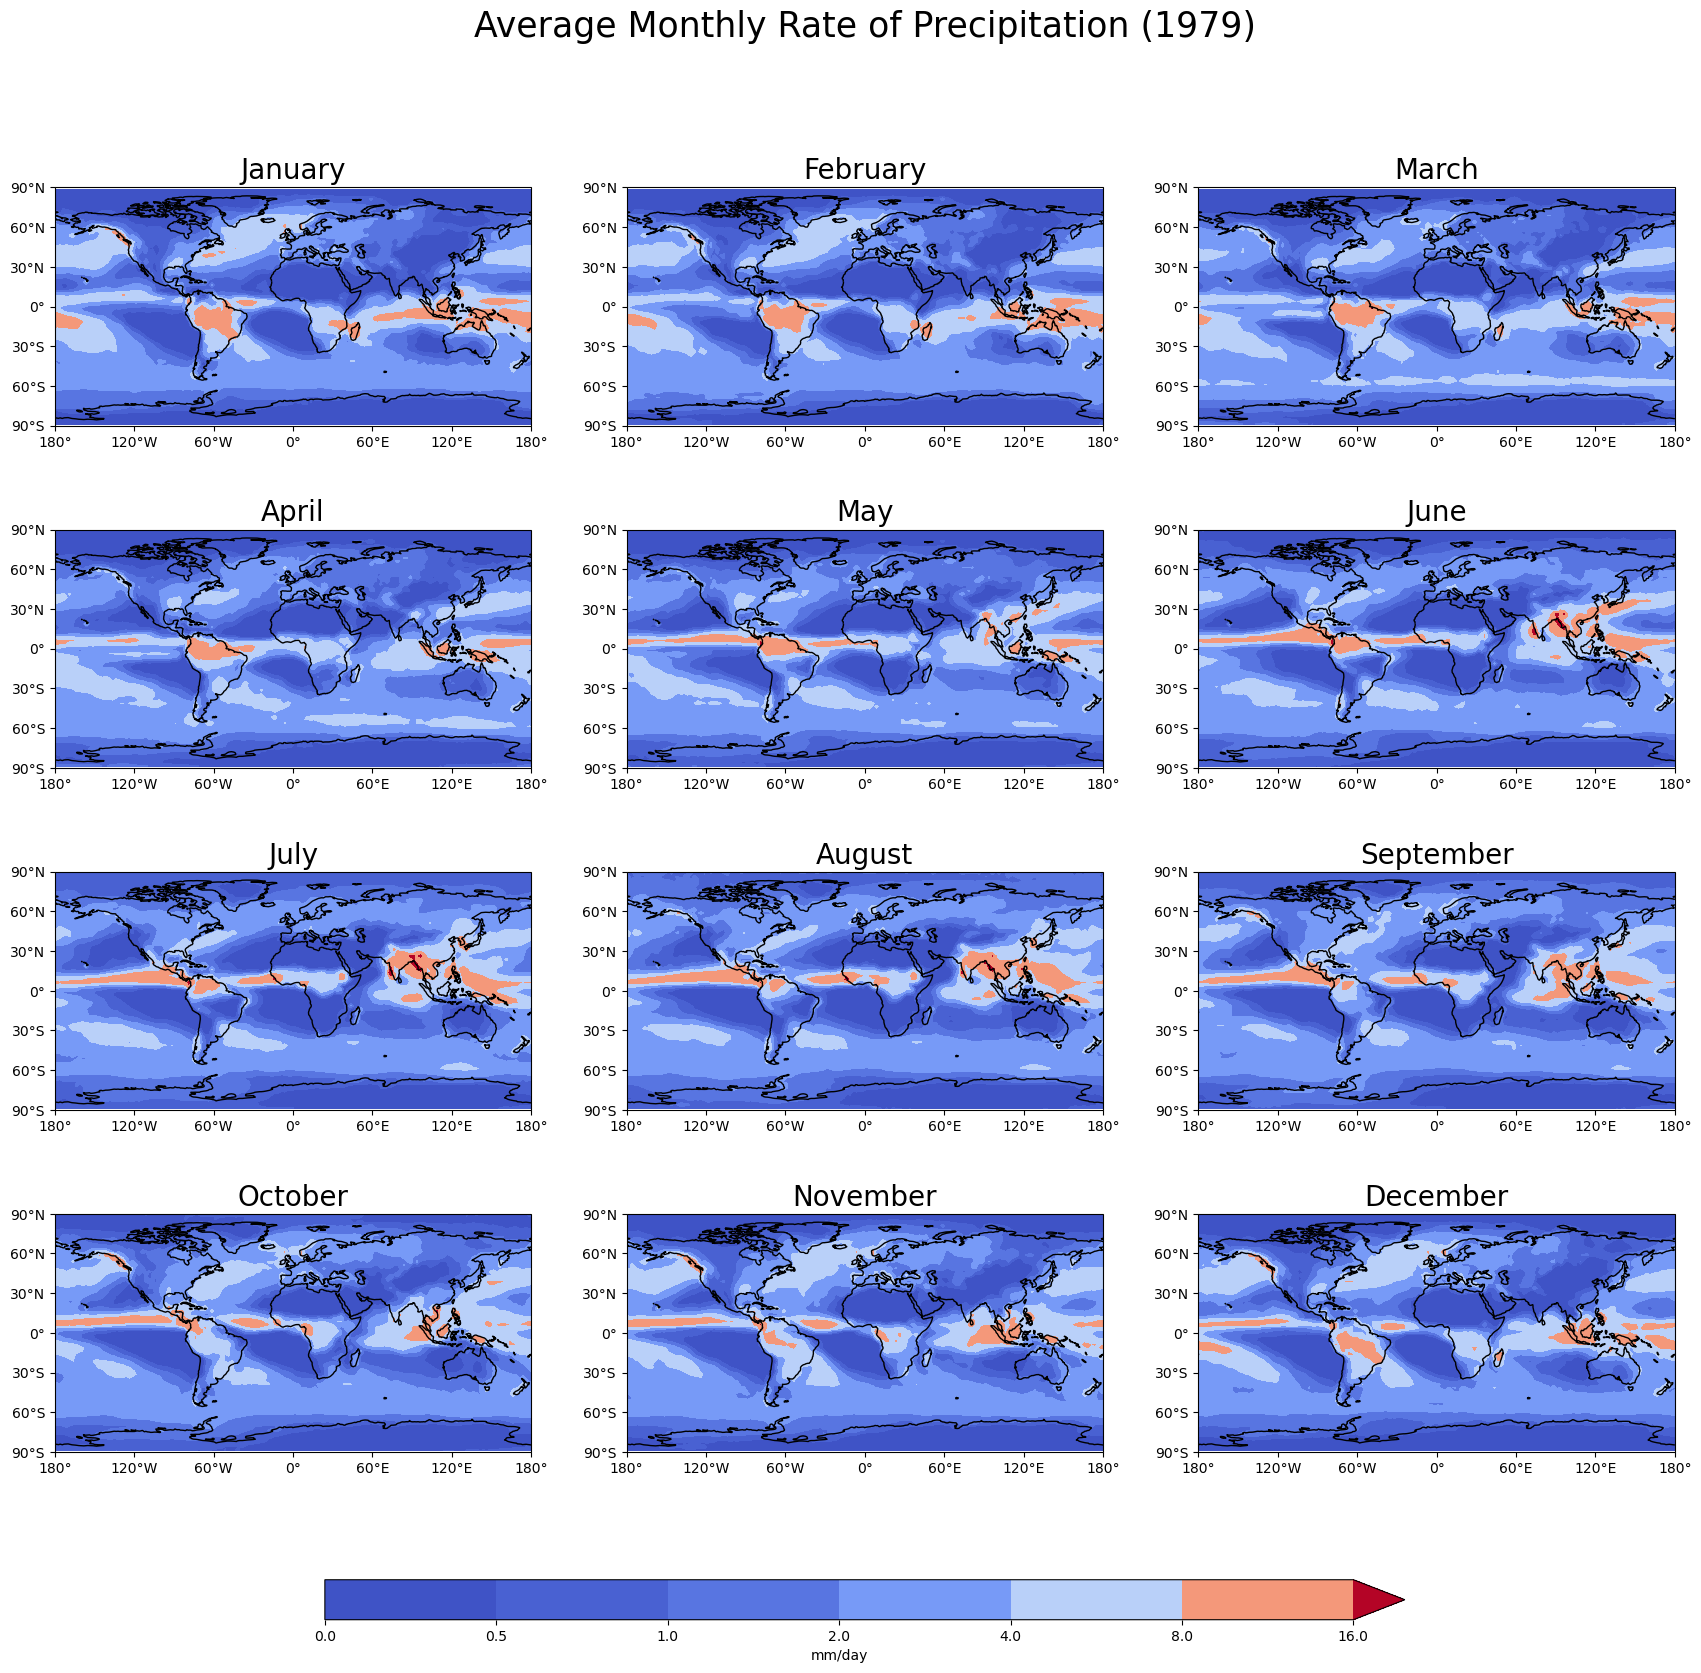

In [16]:
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(18,20))
clevs=np.arange(-5,36,5)
axs=axs.flatten()

for i,mon in enumerate(ds_month['month']):
    data=ds_month['precip'].sel(month=mon)
    data,lons=add_cyclic_point(data,coord=ds_month['lon'])
    cs=axs[i].contourf(lons,ds_month['lat'],data,clevs,
                      transform = ccrs.PlateCarree(),
                      cmap='coolwarm',extend='max',levels=[0,0.5,1,2,4,8,16])
    axs[i].set_title(calendar.month_name[mon.values], fontsize=20)
    axs[i].coastlines()
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)

cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')
plt.suptitle('Average Monthly Rate of Precipitation (1979)', fontsize=25)